In [368]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import os, time, math, datetime
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
import matplotlib.dates as mdate

In [143]:
data = pd.DataFrame()
for file in os.listdir("Data"):
    data = data.append(pd.read_csv("./Data/"+file, skiprows=3), ignore_index=True)

data["Timestamp"] = pd.to_datetime(data['Timestamp'])


In [144]:
data.sort_values("Timestamp",ignore_index=True, inplace=True)
data.to_csv("Electrical_All.csv")
data.set_index('Timestamp', inplace=True)

In [154]:
data = data.groupby(data.index.floor('d')).mean()

In [230]:
ordered_data = data[data.columns[[0,6,11,1,2,5,8,9,3,4,7,10,12]]]
ordered_data.to_csv("Electrical_All.csv")

In [398]:
year_data

,Adam Joseph Lewis Center - Gross Electricity Consumption (kWh),Kohl Building - Total Electricity Use (kWh),Science Center - Electricity Use (kWh),Asia House - Residential Electricity Use (kWh),East - Electricity Use (kWh),Kahn - Total Electricity Use (kWh),Noah - Electricity Use (kWh),North - Electricity Use (kWh),Fairchild - Residential Electricity Use (kWh),Harvey - Electricity Use (kWh),Lord - Electricity Use (kWh),Saunders - Electricity Use (kWh),Talcott - Residential Electricity Use (kWh)
Timestamp,,,,,,,,,,,,,
2018-01-01,7.211771,26.286458,NaN,0.892005,4.490938,9.638542,0.954687,5.730104,0.151445,NaN,0.421380,NaN,0.876680
2018-01-02,7.137370,26.500000,NaN,1.181068,4.797969,10.212240,1.123021,6.320208,0.287682,NaN,0.475339,NaN,0.894167
2018-01-03,7.406367,26.578125,NaN,1.454818,5.382760,10.952083,1.597813,6.917552,0.231732,NaN,1.562995,NaN,1.010195
2018-01-04,7.356602,26.786458,NaN,1.506185,5.162917,11.474219,1.812604,7.363021,0.424622,NaN,3.309271,NaN,1.093971
2018-01-05,8.320703,28.067708,NaN,1.557604,5.131562,10.839844,2.144688,7.144375,0.388516,NaN,3.760625,NaN,1.142513
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,2.970469,25.145833,87.656250,0.949766,NaN,7.713542,1.394271,5.871094,0.158802,0.443297,0.558828,0.418698,0.885208
2018-12-28,2.414375,24.489583,86.765653,0.961875,NaN,8.209115,1.406250,5.805730,0.156315,0.443807,0.577448,0.444896,0.990104
2018-12-29,2.985195,25.302083,83.328125,1.047187,NaN,7.684896,1.393442,5.852917,0.161979,0.444372,0.509870,0.404661,0.910195


In [404]:
ordered_data

,Adam Joseph Lewis Center - Gross Electricity Consumption (kWh),Kohl Building - Total Electricity Use (kWh),Science Center - Electricity Use (kWh),Asia House - Residential Electricity Use (kWh),East - Electricity Use (kWh),Kahn - Total Electricity Use (kWh),Noah - Electricity Use (kWh),North - Electricity Use (kWh),Fairchild - Residential Electricity Use (kWh),Harvey - Electricity Use (kWh),Lord - Electricity Use (kWh),Saunders - Electricity Use (kWh),Talcott - Residential Electricity Use (kWh)
Timestamp,,,,,,,,,,,,,
2013-01-01,4.192083,NaN,NaN,0.692230,5.139488,31.907547,1.650107,5.054331,0.109023,0.365547,0.191875,0.105886,1.084768
2013-01-02,5.782357,NaN,NaN,1.029615,5.830312,36.063542,1.745208,5.880209,0.166367,0.406081,0.235247,0.127513,1.446849
2013-01-03,5.467969,NaN,NaN,1.374802,6.049635,38.786458,1.913125,6.676406,0.278346,0.405599,0.219115,0.177018,1.481589
2013-01-04,4.394909,NaN,NaN,1.287357,6.200052,36.956250,1.978438,6.795990,0.298997,0.528997,0.773737,0.899401,1.681315
2013-01-05,4.390560,NaN,NaN,1.528151,6.384844,38.659375,2.145729,6.791406,0.451419,0.619505,1.214674,1.460495,1.756328
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-05,3.637969,NaN,91.208333,1.787786,5.433385,10.093490,1.928021,NaN,0.929310,0.979781,1.127917,0.863307,0.832122
2023-01-06,5.004740,NaN,92.312500,1.831198,5.111302,10.827604,1.910104,NaN,1.043203,1.021107,1.138281,0.847161,0.862591
2023-01-07,5.115781,NaN,82.791667,1.894258,5.211354,10.789583,1.876458,NaN,0.921315,1.131174,1.181172,0.874219,0.897148


In [232]:
ordered_data.describe()

,Adam Joseph Lewis Center - Gross Electricity Consumption (kWh),Kohl Building - Total Electricity Use (kWh),Science Center - Electricity Use (kWh),Asia House - Residential Electricity Use (kWh),East - Electricity Use (kWh),Kahn - Total Electricity Use (kWh),Noah - Electricity Use (kWh),North - Electricity Use (kWh),Fairchild - Residential Electricity Use (kWh),Harvey - Electricity Use (kWh),Lord - Electricity Use (kWh),Saunders - Electricity Use (kWh),Talcott - Residential Electricity Use (kWh)
count,3514.000000,1048.000000,2005.000000,3477.000000,2876.000000,3364.000000,3453.000000,3193.000000,3634.000000,3328.000000,3333.000000,3426.000000,3409.000000
mean,2.779564,25.778824,90.196301,1.878194,10.840342,13.282377,2.586587,7.884440,0.824460,1.262747,1.960388,1.606759,1.201982
std,1.591383,4.934706,21.471098,0.597322,223.799713,8.155039,0.987624,1.884959,0.506627,0.420909,0.722587,0.678169,0.388778
min,0.065163,9.000000,65.788750,0.068750,0.000000,0.825000,0.802708,2.366927,0.048958,0.365547,0.191875,0.097500,0.142563
25%,1.580540,24.697917,82.583333,1.467930,3.835781,10.025846,1.831146,6.385521,0.393418,0.938137,1.365417,1.109271,0.965273
50%,2.191823,25.820312,86.750000,2.007161,5.413854,11.567578,2.333021,8.111146,0.712051,1.245681,2.021302,1.525207,1.211667
75%,3.801634,26.902344,93.177083,2.351797,7.113645,12.984831,3.150521,9.296875,1.188411,1.497321,2.440026,1.958916,1.447852
max,10.487393,161.733328,825.634052,8.596565,11893.462420,60.146137,12.352821,31.009875,5.724102,4.169715,9.383462,6.766279,4.388559


In [239]:
year_data.isna().sum()

Adam Joseph Lewis Center - Gross Electricity Consumption (kWh)      0
Kohl Building - Total Electricity Use (kWh)                       245
Science Center - Electricity Use (kWh)                            365
Asia House - Residential Electricity Use (kWh)                     12
East - Electricity Use (kWh)                                       90
Kahn - Total Electricity Use (kWh)                                  0
Noah - Electricity Use (kWh)                                       59
North - Electricity Use (kWh)                                      58
Fairchild - Residential Electricity Use (kWh)                       0
Harvey - Electricity Use (kWh)                                    120
Lord - Electricity Use (kWh)                                       60
Saunders - Electricity Use (kWh)                                    0
Talcott - Residential Electricity Use (kWh)                        18
dtype: int64

Adam Joseph Lewis Center - Gross Electricity Consumption (kWh)     1.580540
Kohl Building - Total Electricity Use (kWh)                       24.697917
Science Center - Electricity Use (kWh)                            82.583333
Asia House - Residential Electricity Use (kWh)                     1.467930
East - Electricity Use (kWh)                                       3.835781
Kahn - Total Electricity Use (kWh)                                10.025846
Noah - Electricity Use (kWh)                                       1.831146
North - Electricity Use (kWh)                                      6.385521
Fairchild - Residential Electricity Use (kWh)                      0.393418
Harvey - Electricity Use (kWh)                                     0.938137
Lord - Electricity Use (kWh)                                       1.365417
Saunders - Electricity Use (kWh)                                   1.109271
Talcott - Residential Electricity Use (kWh)                        0.965273
Name: 0.25, 

In [435]:
test

,Adam Joseph Lewis Center - Gross Electricity Consumption (kWh),Kohl Building - Total Electricity Use (kWh),Science Center - Electricity Use (kWh),Asia House - Residential Electricity Use (kWh),East - Electricity Use (kWh),Kahn - Total Electricity Use (kWh),Noah - Electricity Use (kWh),North - Electricity Use (kWh),Fairchild - Residential Electricity Use (kWh),Harvey - Electricity Use (kWh),Lord - Electricity Use (kWh),Saunders - Electricity Use (kWh),Talcott - Residential Electricity Use (kWh)
Timestamp,,,,,,,,,,,,,
2013-01-01,NaN,NaN,NaN,NaN,NaN,31.907547,NaN,NaN,NaN,0.365547,0.191875,0.105886,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN,36.063542,NaN,NaN,NaN,NaN,0.235247,0.127513,NaN
2013-01-03,NaN,NaN,NaN,NaN,NaN,38.786458,NaN,NaN,NaN,NaN,0.219115,0.177018,NaN
2013-01-04,NaN,NaN,NaN,NaN,NaN,36.956250,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-05,NaN,NaN,NaN,NaN,NaN,38.659375,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [445]:
test

,Adam Joseph Lewis Center - Gross Electricity Consumption (kWh),Kohl Building - Total Electricity Use (kWh),Science Center - Electricity Use (kWh),Asia House - Residential Electricity Use (kWh),East - Electricity Use (kWh),Kahn - Total Electricity Use (kWh),Noah - Electricity Use (kWh),North - Electricity Use (kWh),Fairchild - Residential Electricity Use (kWh),Harvey - Electricity Use (kWh),Lord - Electricity Use (kWh),Saunders - Electricity Use (kWh),Talcott - Residential Electricity Use (kWh)
Timestamp,,,,,,,,,,,,,
2013-01-01,4.192083,NaN,NaN,0.692230,5.139488,NaN,1.650107,5.054331,0.109023,NaN,NaN,NaN,1.084768
2013-01-02,5.782357,NaN,NaN,1.029615,5.830312,NaN,1.745208,5.880209,0.166367,0.406081,NaN,NaN,1.446849
2013-01-03,5.467969,NaN,NaN,1.374802,6.049635,NaN,1.913125,6.676406,0.278346,0.405599,NaN,NaN,1.481589
2013-01-04,4.394909,NaN,NaN,1.287357,6.200052,NaN,1.978438,6.795990,0.298997,0.528997,0.773737,0.899401,1.681315
2013-01-05,4.390560,NaN,NaN,1.528151,6.384844,NaN,2.145729,6.791406,0.451419,0.619505,1.214674,1.460495,1.756328
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-05,3.637969,NaN,91.208333,1.787786,5.433385,10.093490,1.928021,NaN,0.929310,0.979781,1.127917,0.863307,0.832122
2023-01-06,5.004740,NaN,92.312500,1.831198,5.111302,10.827604,1.910104,NaN,1.043203,1.021107,1.138281,0.847161,0.862591
2023-01-07,5.115781,NaN,82.791667,1.894258,5.211354,10.789583,1.876458,NaN,0.921315,1.131174,1.181172,0.874219,0.897148


In [465]:
outlier_margin = 7.5
test_data = ordered_data[~((ordered_data < (Q1 - outlier_margin * IQR)) |(ordered_data > (Q3 + outlier_margin * IQR))).any(axis=1)]
test_data

,Adam Joseph Lewis Center - Gross Electricity Consumption (kWh),Kohl Building - Total Electricity Use (kWh),Science Center - Electricity Use (kWh),Asia House - Residential Electricity Use (kWh),East - Electricity Use (kWh),Kahn - Total Electricity Use (kWh),Noah - Electricity Use (kWh),North - Electricity Use (kWh),Fairchild - Residential Electricity Use (kWh),Harvey - Electricity Use (kWh),Lord - Electricity Use (kWh),Saunders - Electricity Use (kWh),Talcott - Residential Electricity Use (kWh)
Timestamp,,,,,,,,,,,,,
2013-01-01,4.192083,NaN,NaN,0.692230,5.139488,31.907547,1.650107,5.054331,0.109023,0.365547,0.191875,0.105886,1.084768
2013-05-01,1.044427,NaN,NaN,2.415065,8.343385,NaN,3.119584,8.117552,0.736419,1.635557,2.433073,2.305365,0.904141
2013-05-02,1.228932,NaN,NaN,2.490813,8.991823,NaN,2.931562,8.041094,0.789128,1.609763,2.280312,2.076146,0.969837
2013-05-03,1.166622,NaN,NaN,2.364084,8.955479,NaN,2.983936,8.192448,0.736223,1.806584,2.312633,2.235664,1.133844
2013-05-04,0.780286,NaN,NaN,2.311588,8.420000,NaN,3.133646,8.196302,0.810482,1.904474,2.337501,2.324583,1.014492
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-05,3.637969,NaN,91.208333,1.787786,5.433385,10.093490,1.928021,NaN,0.929310,0.979781,1.127917,0.863307,0.832122
2023-01-06,5.004740,NaN,92.312500,1.831198,5.111302,10.827604,1.910104,NaN,1.043203,1.021107,1.138281,0.847161,0.862591
2023-01-07,5.115781,NaN,82.791667,1.894258,5.211354,10.789583,1.876458,NaN,0.921315,1.131174,1.181172,0.874219,0.897148


In [456]:
Q1 = ordered_data.quantile(0.25)
Q3 = ordered_data.quantile(0.75)
IQR = Q3 - Q1



In [391]:
# get the building type and color code
def setCategories(col_num):
        if col_num < 3:
            return "Academic Building", "lightcoral"
        if col_num < 8:
            return "North Residential Hall", "mediumpurple"
        else:
            return "South Residential Hall", "cornflowerblue"

# Plot by year
def plot_by_year(year, data, fontsize = 15, margin = 10, labelrotation=10):
    year_data = data[data.index.year == year]

    col_num=0
    fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(30, 20))
    fig.suptitle(str(year) +" Electricity Usage", fontsize = fontsize + 10)

    
    
    categories = {}
    
    for row in ax:
        for col in row:
            set_label, set_color = setCategories(col_num)
            label = col.bar(year_data.index, year_data[year_data.columns[col_num]], label = set_label, color=set_color) 

            if set_label not in categories:
                categories[set_label] = label
            
            col.set_xlabel("Month", fontsize=fontsize)
            col.set_ylabel("kWh", fontsize=fontsize)
            col.set_xlim([datetime.date(year-1, 12, 31-margin), datetime.date(year+1, 1, margin)]) #CHANGE
            col.set_title(year_data.columns[col_num], fontsize=fontsize, color=setColor(col_num))
            col.xaxis.set_major_formatter(DateFormatter("%Y-%m"))
            col.tick_params(axis='x', labelsize=fontsize, labelrotation = labelrotation)
            col.tick_params(axis='y', labelsize=fontsize)
            col_num+=1
            
    plt.tight_layout(pad=6.5, w_pad=0.5, h_pad=2)
    
    plt.legend(handles=categories.values(), bbox_to_anchor=[-1.1, 3.9], fontsize=fontsize)
    plt.savefig(f"./Graphs/Year/{year}_Electrical.png")

    # Plot from 2013 to 2023
# for year in range(2013, 2023):
#     plot_by_year(year, ordered_data)

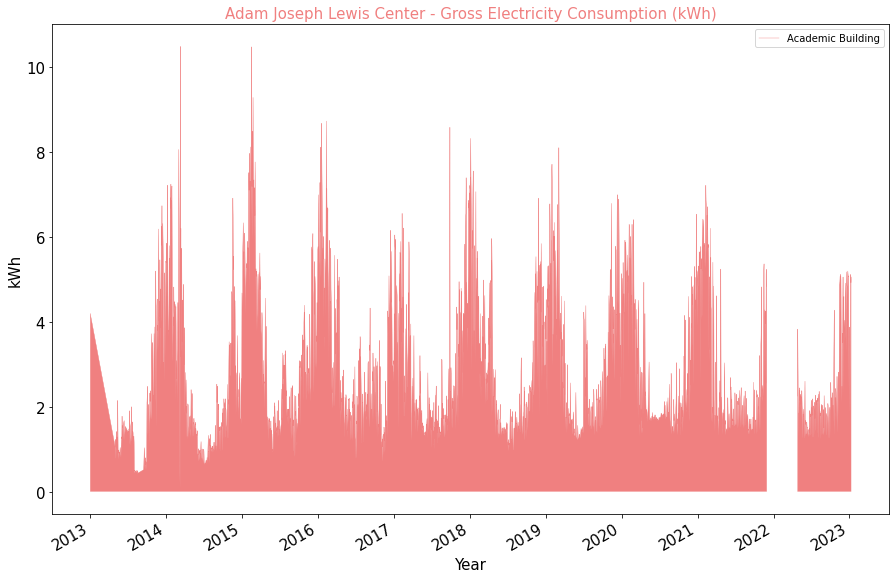

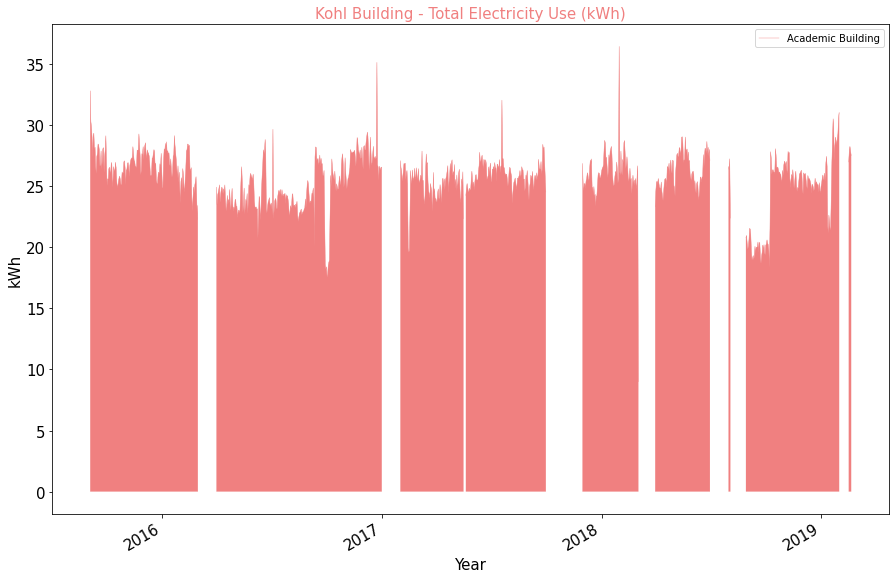

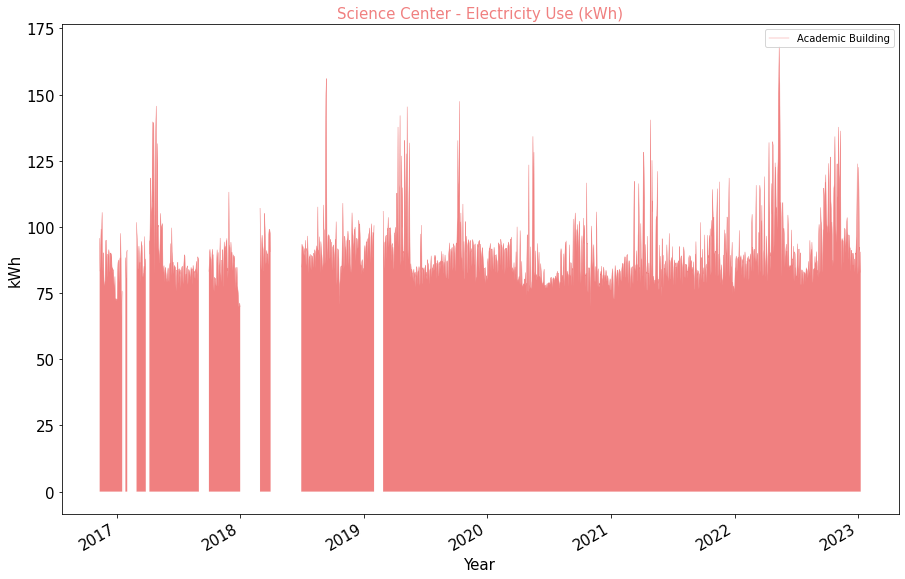

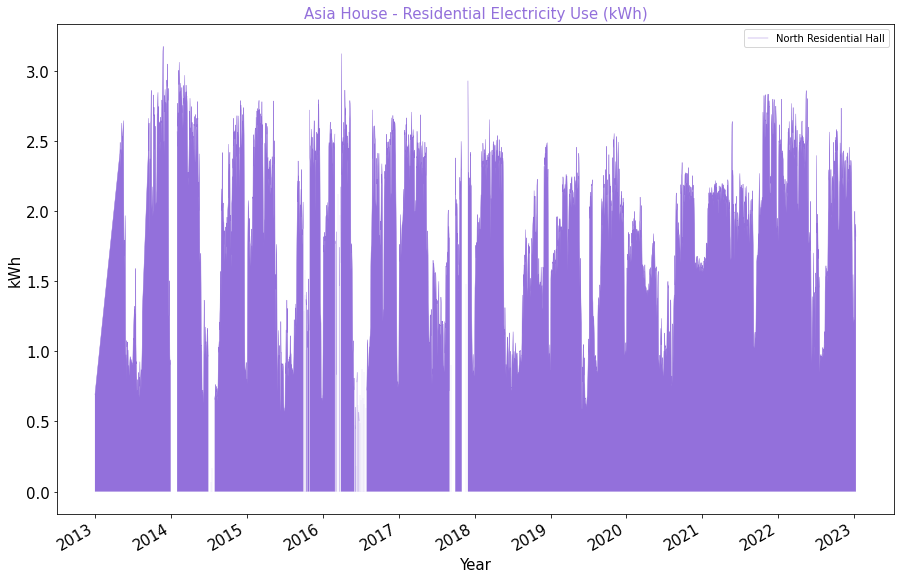

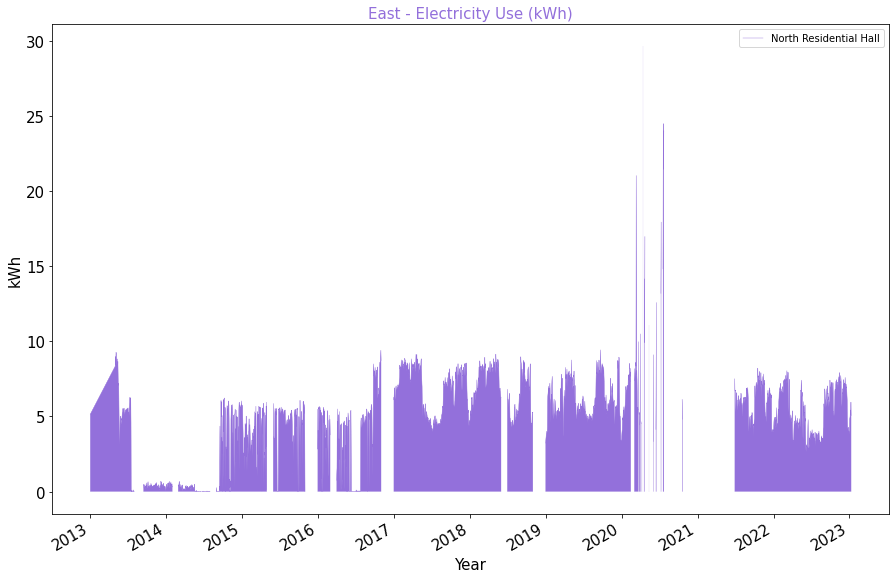

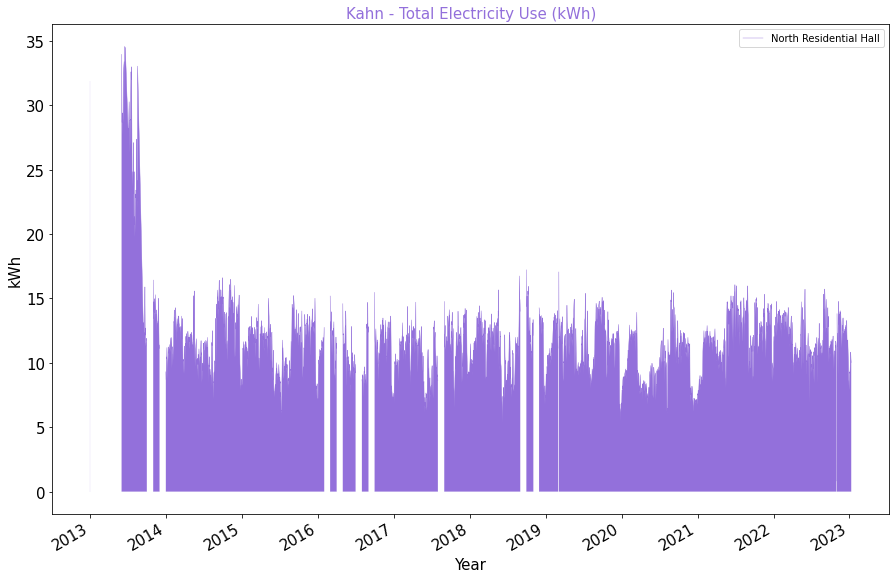

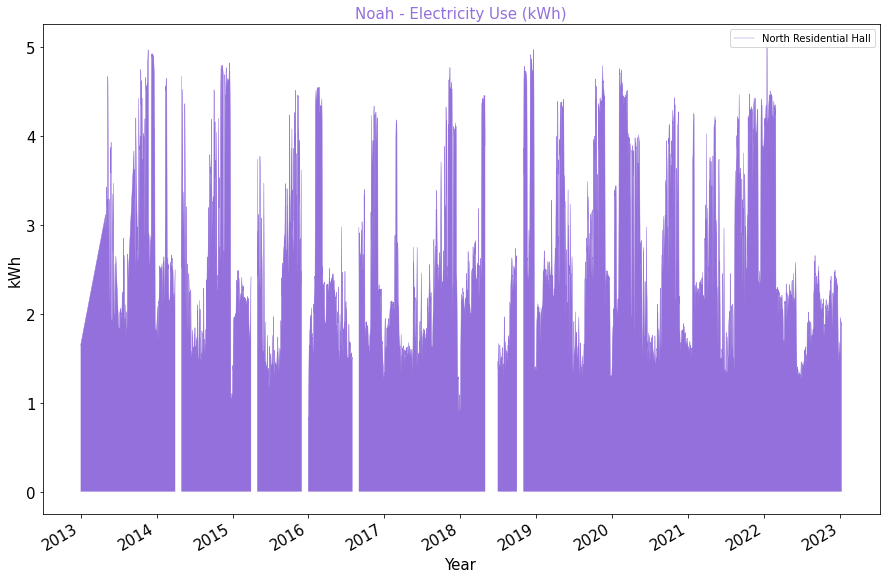

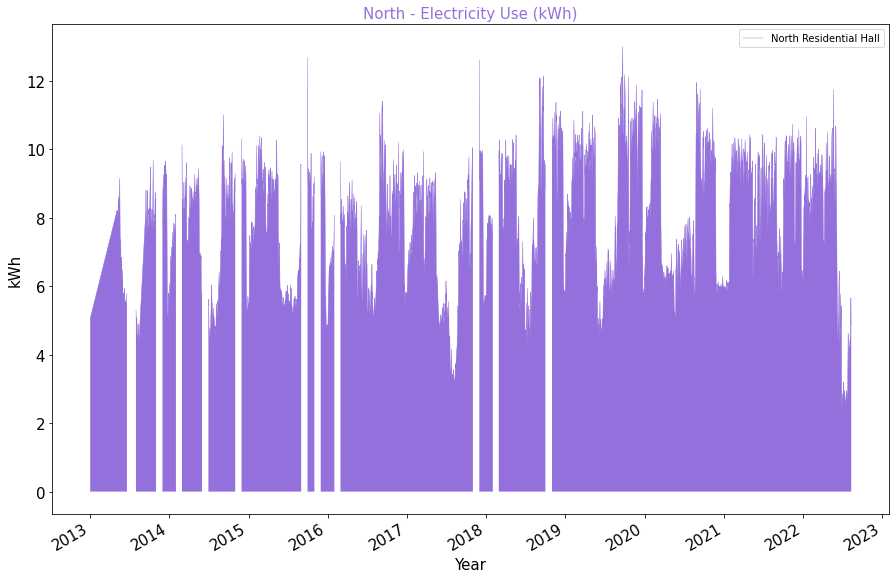

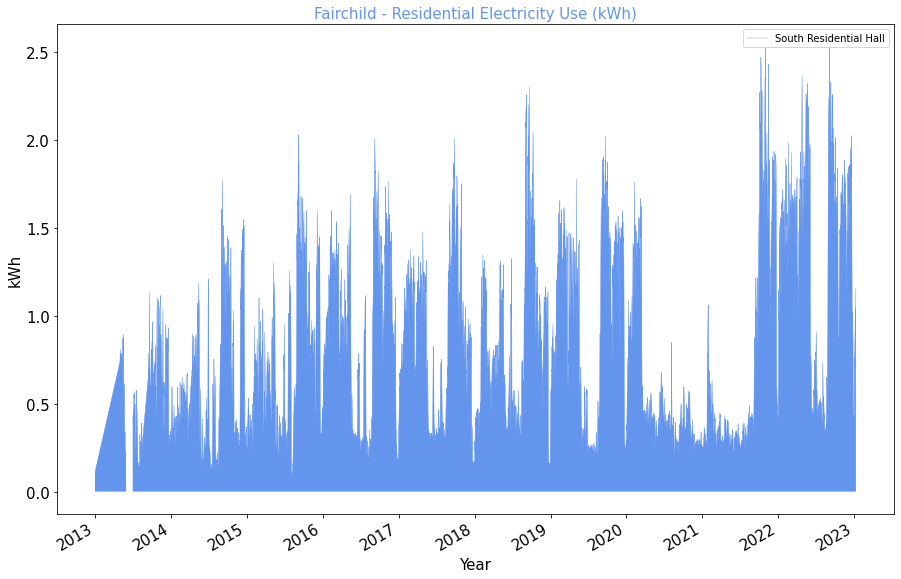

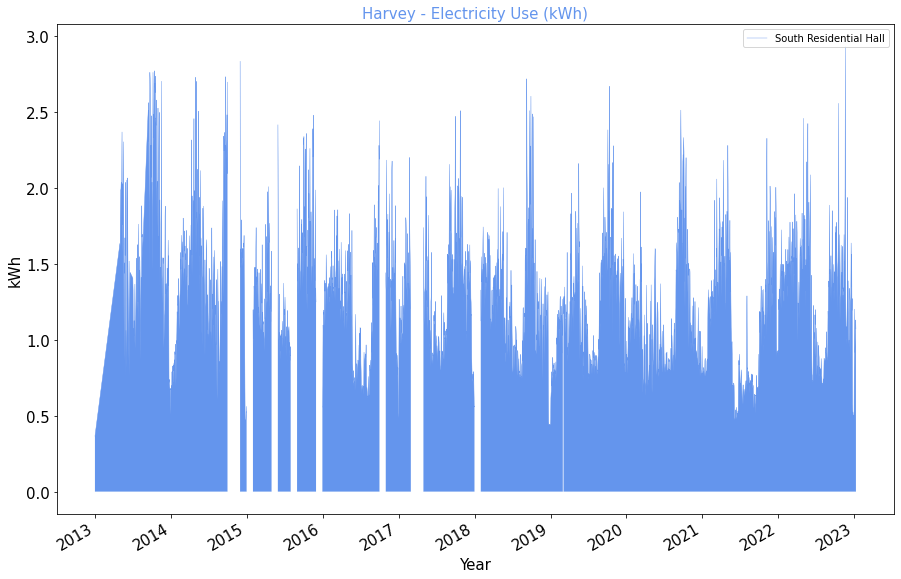

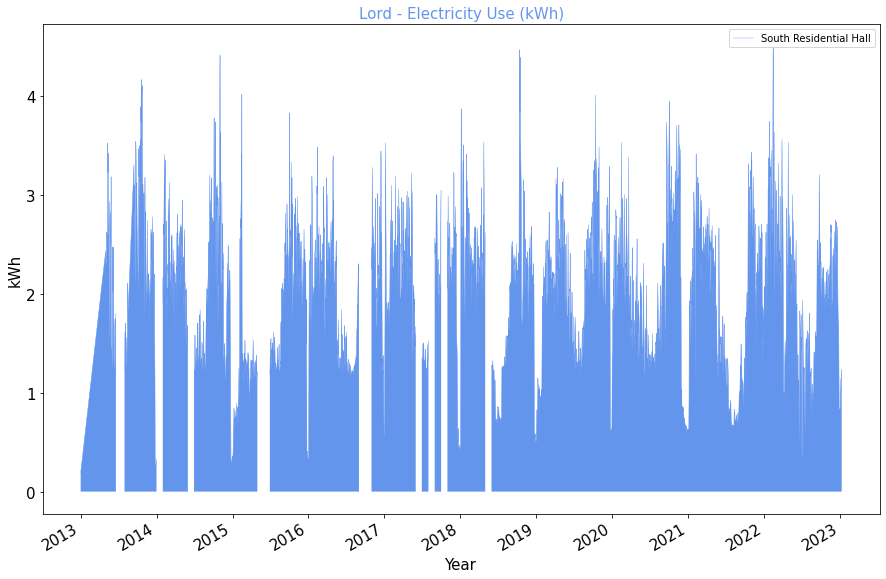

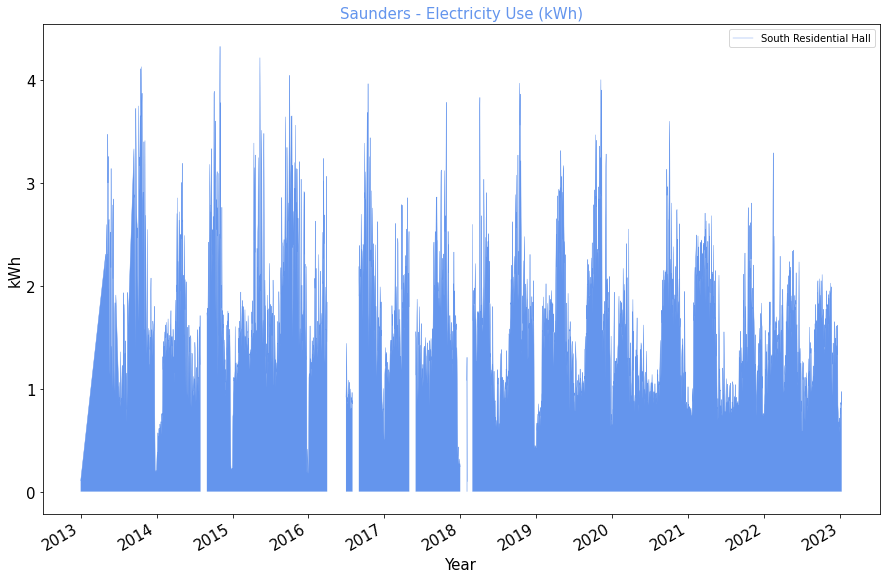

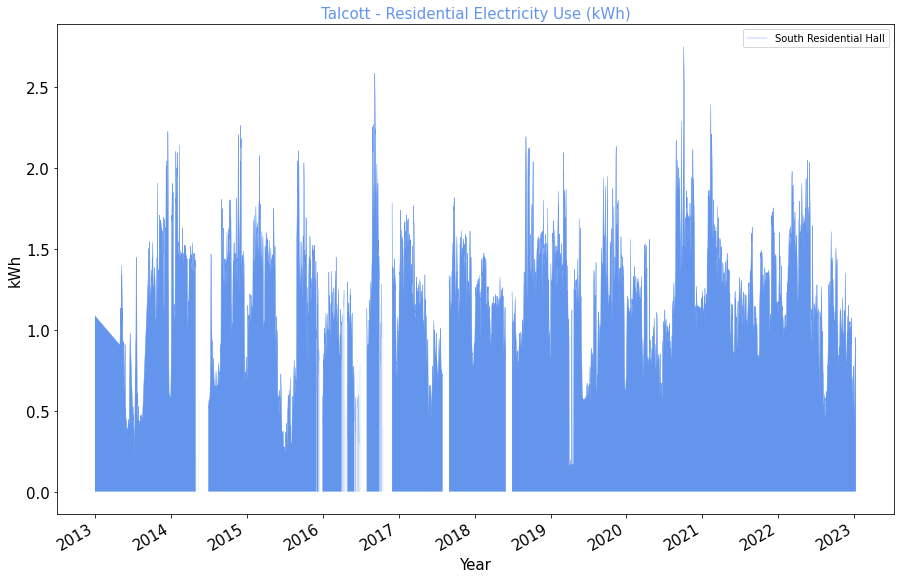

In [495]:
# Plot by dorm
def plot_by_dorm(data, col_num, fontsize = 15, margin = 10):
    # get color code and building type
    set_label, set_color = setCategories(col_num)
    
    #plot bar figure
    plt.figure(figsize=(15, 10))
    plt.plot(data.index, data, label = set_label, color = set_color, linewidth= 0.4)
    plt.fill_between(data.index, data, 0, color = set_color, linewidth= 0.1)
    plt.xlabel("Year", fontsize=fontsize)
    plt.ylabel("kWh", fontsize=fontsize)
    plt.title(data.name, fontsize=fontsize, color = set_color)
    plt.tick_params(axis='x', labelsize=fontsize)
    plt.tick_params(axis='y', labelsize=fontsize)
    
    # show every year on x_axis
    plt.gca().xaxis.set_major_locator(mdate.YearLocator())
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
    plt.gcf().autofmt_xdate()            
    # plt.tight_layout()
    
    # show building type in legend
    plt.legend(loc = "upper right")

    plt.savefig(f"./Graphs/Building/{data.name}_Electrical.png")

# col_num = 9
# plot_by_dorm(ordered_data[test_data.columns[col_num]], col_num)
for col_num in range(len(test_data.columns)):
    plot_by_dorm(test_data[test_data.columns[col_num]], col_num)

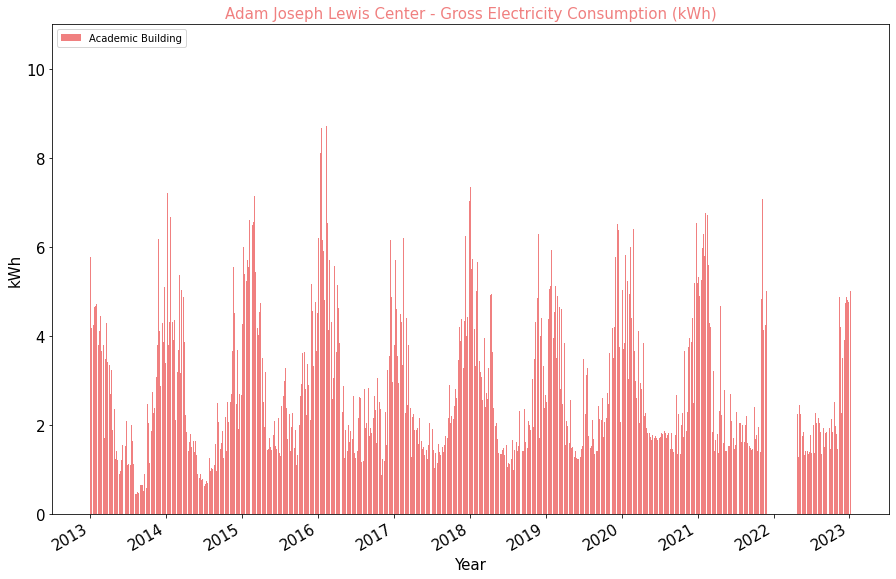

In [397]:
plot_by_dorm(ordered_data[ordered_data.columns[0]], 0)

In [ ]:
# def plot(data, ax, fontsize=12):
#     ax.bar(data.index, data) 
# #     ax.locator_params(nbins=3)
#     ax.set_xlabel('Date', fontsize=fontsize)
#     ax.set_ylabel('kWh', fontsize=fontsize)
#     ax.set_title('Title', fontsize=fontsize)
    
# fig = plt.figure(figsize=(20, 10))

# ax1 = plt.subplot(221, sharex='col', sharey='row')
# ax2 = plt.subplot(223, sharex='col', sharey='row')
# ax3 = plt.subplot(122, sharex='col', sharey='row')


# plot(year_data[year_data.columns[1]], ax1)
# plot(year_data[year_data.columns[2]], ax2)
# plot(year_data[year_data.columns[3]],ax3)